In [1]:
# -*- coding: utf-8 -*-
# -*- authors : Vincent Roduit -*-
# -*- date : 2025-04-24 -*-
# -*- Last revision: 2025-05-02 by janzgraggen -*-
# -*- python version : 3.11.11 -*-
# -*- Description: Notebook that summarizeses the main results-*-

# <center> EE-452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Graph-based EEG Analysis </center>
---

In [26]:
#import libraries
import pandas as pd
from pathlib import Path
import sys

from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

#import modules
import constants
from transform_func import *
from models.cnn_base import CnnBase
from dataloader import load_data
from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

## Train

In [28]:
# cnn train data
cfg = read_yml('../config/exp/cnn/basic_cnn_local_upsample.yml')
loader_train = load_data(cfg.get("datasets")[0])

In [43]:
%%time
# gml correlation graph train data
cfg = read_yml('../config/exp/test/basic_correlation_gml.yml')
loader_train = load_data(cfg.get("datasets")[0])

/opt/homebrew/Caskroom/miniconda/base/envs/nml-project/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


CPU times: user 30.6 s, sys: 3.25 s, total: 33.8 s
Wall time: 29.5 s


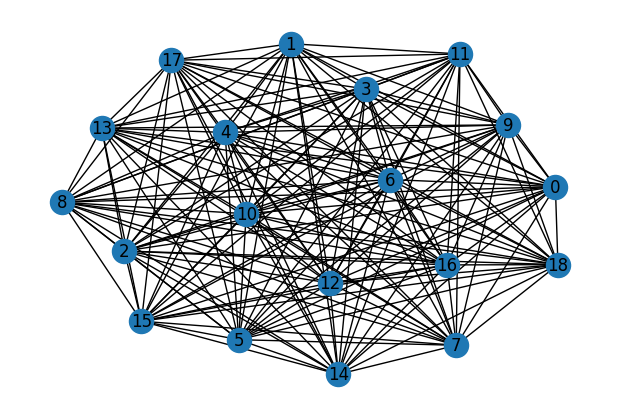

In [44]:
plt.figure(figsize=(6, 4))
G = to_networkx(loader_train[0], to_undirected=True, node_attrs=['x'])
pos = nx.spring_layout(G,)  # or use any other layout
nx.draw(G, pos, with_labels=True, node_size=300)
plt.show()

In [41]:
%%time
# gml distance based graph train data
cfg = read_yml('../config/exp/test/basic_distance_gml.yml')
loader_train = load_data(cfg.get("datasets")[0])

CPU times: user 15.7 s, sys: 3.39 s, total: 19.1 s
Wall time: 14.9 s


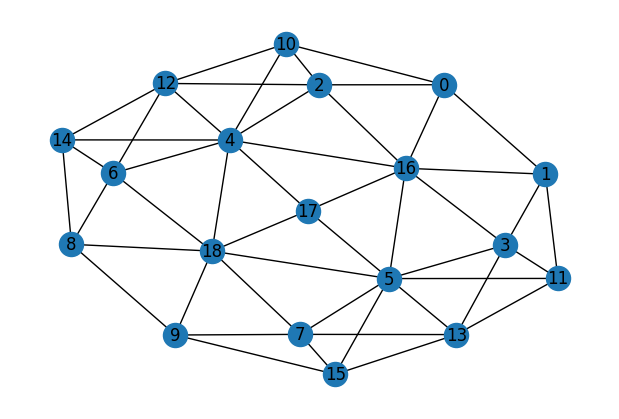

In [42]:
plt.figure(figsize=(6, 4))
G = to_networkx(loader_train[0], to_undirected=True, node_attrs=['x'])
pos = nx.spring_layout(G,)  # or use any other layout
nx.draw(G, pos, with_labels=True, node_size=300)
plt.show()

## Validation

In [15]:
loader_val = load_data(cfg.get("datasets")[1])

## Test

In [16]:
loader_test = load_data(cfg.get("datasets")[2])

In [18]:
for test_samples, test_labels in loader_test:  
    sample_sample = test_samples[0]    # Reshape them according to your needs.
    sample_label = test_labels[0]

In [20]:
sample_label

tensor(0)

In [2]:
import pandas as pd
test = pd.read_parquet('/Users/vincentroduit/Desktop/segments.parquet')

In [3]:
test

start_time  end_time       date  sampling_rate  \
patient  session   segment                                                   
pqejgcvm s001_t000 0               0.0      12.0 2002-01-01            250   
                   1              12.0      24.0 2002-01-01            250   
                   2              24.0      36.0 2002-01-01            250   
                   3              36.0      48.0 2002-01-01            250   
                   4              48.0      60.0 2002-01-01            250   
...                                ...       ...        ...            ...   
pqejgvej s001_t000 153          1836.0    1848.0 2015-01-01            250   
                   154          1848.0    1860.0 2015-01-01            250   
                   155          1860.0    1872.0 2015-01-01            250   
                   156          1872.0    1884.0 2015-01-01            250   
                   157          1884.0    1896.0 2015-01-01            250   

                                                  signals_path  
patient  session   segment                                      
pqejgcvm s001_t000 0        signals/pqejgcvm_s001_t000.parquet  
                   1        signals/pqejgcvm_s001_t000.parquet  
                   2        signals/pqejgcvm_s001_t000.parquet  
                   3        signals/pqejgcvm_s001_t000.parquet  
                   4        signals/pqejgcvm_s001_t000.parquet  
...                                                        ...  
pqejgvej s001_t000 153      signals/pqejgvej_s001_t000.parquet  
                   154      signals/pqejgvej_s001_t000.parquet  
                   155      signals/pqejgvej_s001_t000.parquet  
                   156      signals/pqejgvej_s001_t000.parquet  
                   157      signals/pqejgvej_s001_t000.parquet  

[3614 rows x 5 columns]

# Models

## Basic CNN

In [10]:
basic_cnn = CnnModel(input_shape=19, output_shape=1)

In [11]:
basic_cnn.train_model(loader_tr=loader_train, num_epochs=1)

Training: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


In [14]:
basic_cnn.create_submission(loader_test, 'test.csv')

Submission file created at test.csv


,id,label
0,tensor(0),0
1,tensor(0),0
2,tensor(0),0
3,tensor(0),0
4,tensor(0),0
...,...,...
3609,tensor(0),0
3610,tensor(0),0
3611,tensor(0),0
3612,tensor(0),0
